In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
df_budgets = pd.read_csv('../data/tn.movie_budgets.csv.gz')

In [9]:
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.1+ KB


In [11]:
df_budgets = df_budgets.applymap(lambda x: str(x).replace('$', ''))
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"


In [12]:
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].map(lambda x: str(x).replace(',', '_'))
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].map(lambda x: str(x).replace(',', '_'))
df_budgets['production_budget'] = df_budgets['production_budget'].map(lambda x: str(x).replace(',', '_'))



In [13]:
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].astype(int)
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].astype(int)
df_budgets['production_budget'] = df_budgets['production_budget'].astype(int)

In [14]:
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [15]:
df_budgets['worldwide_roi'] = (df_budgets['worldwide_gross'] / df_budgets['production_budget']) *100

In [16]:
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,653.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,254.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,42.789243
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,424.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,415.369636


In [17]:
df_budgets.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi
5777,78,"Dec 31, 2018",Red 11,7000,0,0,0.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,4008.250000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,26.760000
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000
5781,82,"Aug 5, 2005",My Date With Drew,1100,181041,181041,16458.272727


In [18]:
df_budgets['worldwide_roi'].describe()

count      5782.000000
mean        480.016137
std        2953.028231
min           0.000000
25%          49.229560
50%         170.830983
75%         375.834608
max      180000.000000
Name: worldwide_roi, dtype: float64

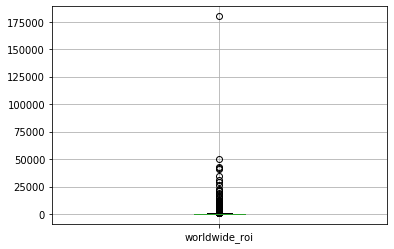

In [35]:
df_budgets.boxplot('worldwide_roi')

In [21]:
df_budgets.sort_values('worldwide_roi', ascending=False, inplace=True)
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi
5745,46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,180000.000000
5613,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,49875.000000
5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,43151.785333
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41656.474000
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,41383.333333


In [22]:
df_budgets2 = df_budgets.copy()

In [23]:
df_budgets2.drop(5745, axis=0, inplace=True)

In [50]:
df_budgets2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi
5613,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,49875.000000
5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,43151.785333
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41656.474000
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,41383.333333
5709,10,"May 7, 2004",Super Size Me,65000,11529368,22233808,34205.858462


In [52]:
df_budgets2.reset_index(inplace=True)

In [53]:
df_budgets2.head()

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi
0,5613,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,49875.000000
1,5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,43151.785333
2,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41656.474000
3,5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,41383.333333
4,5709,10,"May 7, 2004",Super Size Me,65000,11529368,22233808,34205.858462


In [54]:
df_budgets2.drop('index', axis=1, inplace=True)

In [55]:
df_budgets2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi
0,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,49875.000000
1,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,43151.785333
2,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41656.474000
3,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,41383.333333
4,10,"May 7, 2004",Super Size Me,65000,11529368,22233808,34205.858462


In [56]:
df_budgets2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 7 columns):
id                   5781 non-null object
release_date         5781 non-null object
movie                5781 non-null object
production_budget    5781 non-null int64
domestic_gross       5781 non-null int64
worldwide_gross      5781 non-null int64
worldwide_roi        5781 non-null float64
dtypes: float64(1), int64(3), object(3)
memory usage: 316.2+ KB


In [58]:
df_budgets2['worldwide_roi'].describe()

count     5781.000000
mean       448.962688
std       1773.482722
min          0.000000
25%         49.208840
50%        170.763234
75%        375.568161
max      49875.000000
Name: worldwide_roi, dtype: float64

In [24]:
names = ['low', 'somewhat low', 'moderate', 'somewhat high', 'high']
bins = [0, 49.208840, 170.763234, 375.568161, 49875.000000]

In [26]:
pd.qcut(df_budgets2['worldwide_roi'], 5, labels=names)

5613    high
5492    high
5679    high
5406    high
5709    high
5346    high
5773    high
5676    high
5210    high
5536    high
5715    high
5665    high
5372    high
5781    high
5656    high
5742    high
5612    high
5117    high
5357    high
5774    high
5746    high
5507    high
5430    high
5424    high
5680    high
5211    high
5655    high
4567    high
5677    high
5568    high
        ... 
5491     low
5490     low
5489     low
5488     low
5487     low
5486     low
5114     low
5115     low
2011     low
4189     low
4563     low
4760     low
4759     low
5535     low
5534     low
5533     low
3822     low
4564     low
4565     low
4566     low
5037     low
4190     low
3163     low
3162     low
5523     low
5522     low
5521     low
5520     low
5116     low
4982     low
Name: worldwide_roi, Length: 5781, dtype: category
Categories (5, object): [low < somewhat low < moderate < somewhat high < high]

In [37]:
df_budgets2['roi_category'] = pd.qcut(df_budgets2['worldwide_roi'], 5, labels=names)

In [38]:
df_budgets2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi,roi_category,movie_year
5613,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,49875.000000,high,Mad Max (1980)
5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,43151.785333,high,Paranormal Activity (2009)
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41656.474000,high,The Gallows (2015)
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,41383.333333,high,The Blair Witch Project (1999)
5709,10,"May 7, 2004",Super Size Me,65000,11529368,22233808,34205.858462,high,Super Size Me (2004)


In [39]:
df_budgets2['movie_year'] = df_budgets2['movie']+" (" + df_budgets2['release_date'].map(lambda x: x[-4: len(x)])+")"

In [40]:
df_budgets2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi,roi_category,movie_year
5613,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,49875.000000,high,Mad Max (1980)
5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,43151.785333,high,Paranormal Activity (2009)
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41656.474000,high,The Gallows (2015)
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,41383.333333,high,The Blair Witch Project (1999)
5709,10,"May 7, 2004",Super Size Me,65000,11529368,22233808,34205.858462,high,Super Size Me (2004)


In [41]:
basics = pd.read_csv('../data/imdb.title.basics.csv.gz')

In [42]:
basics.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [43]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [44]:
basics['movie_year'] = basics['primary_title']+" (" + basics['start_year'].astype(str)+")"




In [45]:
basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,movie_year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sunghursh (2013)
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",One Day Before the Rainy Season (2019)
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,The Other Side of the Wind (2018)
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Sabse Bada Sukh (2018)
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",The Wandering Soap Opera (2017)


In [46]:
merged_data = df_budgets2.merge(basics, how='left', on='movie_year')

In [47]:
merged_data.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi,roi_category,movie_year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,49875.000000,high,Mad Max (1980),NaN,NaN,NaN,NaN,NaN,NaN
1,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,43151.785333,high,Paranormal Activity (2009),NaN,NaN,NaN,NaN,NaN,NaN
2,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41656.474000,high,The Gallows (2015),tt2309260,The Gallows,The Gallows,2015.0,81.0,"Horror,Mystery,Thriller"
3,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,41383.333333,high,The Blair Witch Project (1999),NaN,NaN,NaN,NaN,NaN,NaN
4,10,"May 7, 2004",Super Size Me,65000,11529368,22233808,34205.858462,high,Super Size Me (2004),NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5844 entries, 0 to 5843
Data columns (total 15 columns):
id                   5844 non-null object
release_date         5844 non-null object
movie                5844 non-null object
production_budget    5844 non-null int64
domestic_gross       5844 non-null int64
worldwide_gross      5844 non-null int64
worldwide_roi        5844 non-null float64
roi_category         5844 non-null category
movie_year           5844 non-null object
tconst               1545 non-null object
primary_title        1545 non-null object
original_title       1545 non-null object
start_year           1545 non-null float64
runtime_minutes      1519 non-null float64
genres               1539 non-null object
dtypes: category(1), float64(3), int64(3), object(8)
memory usage: 690.7+ KB


In [53]:
fulldata = merged_data.loc[~merged_data.isna().any(axis=1)]
fulldata.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi,roi_category,movie_year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
2,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41656.474000,high,The Gallows (2015),tt2309260,The Gallows,The Gallows,2015.0,81.0,"Horror,Mystery,Thriller"
25,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,10175.949000,high,The Devil Inside (2012),tt1560985,The Devil Inside,The Devil Inside,2012.0,83.0,Horror
51,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,5917.067733,high,Paranormal Activity 2 (2010),tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010.0,91.0,Horror
59,49,"Feb 24, 2017",Get Out,5000000,176040665,255367951,5107.359020,high,Get Out (2017),tt5052448,Get Out,Get Out,2017.0,104.0,"Horror,Mystery,Thriller"
65,64,"Oct 21, 2016",Moonlight,1500000,27854931,65245512,4349.700800,high,Moonlight (2016),tt4975722,Moonlight,Moonlight,2016.0,111.0,Drama


In [54]:
df_budgets2['worldwide_roi'].describe()

count     5781.000000
mean       448.962688
std       1773.482722
min          0.000000
25%         49.208840
50%        170.763234
75%        375.568161
max      49875.000000
Name: worldwide_roi, dtype: float64

In [55]:
fulldata['worldwide_roi'].describe()

count     1517.000000
mean       367.577120
std       1199.006065
min          0.000000
25%         72.365130
50%        211.655794
75%        397.540927
max      41656.474000
Name: worldwide_roi, dtype: float64

In [62]:
fulldata['roi_category2'] = pd.qcut(fulldata['worldwide_roi'], 5, labels=names)

In [63]:
fulldata = fulldata.drop('roi_category2', axis=1)

In [64]:
print(fulldata)

      id  release_date                     movie  production_budget  \
2     80  Jul 10, 2015               The Gallows             100000   
25    12   Jan 6, 2012          The Devil Inside            1000000   
51    65  Oct 20, 2010     Paranormal Activity 2            3000000   
59    49  Feb 24, 2017                   Get Out            5000000   
65    64  Oct 21, 2016                 Moonlight            1500000   
66    18  May 25, 2012         Chernobyl Diaries            1000000   
68    51  Oct 21, 2011     Paranormal Activity 3            5000000   
73    84   Oct 3, 2014                 Annabelle            6500000   
77    15  Aug 27, 2010         The Last Exorcism            1800000   
97    56  Dec 21, 2016                    Dangal            9500000   
103   67   Jun 7, 2013                 The Purge            3000000   
106   55  Jul 22, 2016                Lights Out            5000000   
107   55  Jul 22, 2016                Lights Out            5000000   
109   

In [68]:
fulldata.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi,roi_category,movie_year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
2,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41656.474000,high,The Gallows (2015),tt2309260,The Gallows,The Gallows,2015.0,81.0,"Horror,Mystery,Thriller"
25,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,10175.949000,high,The Devil Inside (2012),tt1560985,The Devil Inside,The Devil Inside,2012.0,83.0,Horror
51,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,5917.067733,high,Paranormal Activity 2 (2010),tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010.0,91.0,Horror
59,49,"Feb 24, 2017",Get Out,5000000,176040665,255367951,5107.359020,high,Get Out (2017),tt5052448,Get Out,Get Out,2017.0,104.0,"Horror,Mystery,Thriller"
65,64,"Oct 21, 2016",Moonlight,1500000,27854931,65245512,4349.700800,high,Moonlight (2016),tt4975722,Moonlight,Moonlight,2016.0,111.0,Drama


In [66]:
fulldata['genres'].value_counts()



Adventure,Animation,Comedy    67
Drama                         63
Comedy                        55
Action,Adventure,Sci-Fi       52
Comedy,Drama,Romance          52
Comedy,Drama                  48
Comedy,Romance                41
Action,Crime,Drama            39
Drama,Romance                 34
Horror,Mystery,Thriller       31
Action,Comedy,Crime           31
Action,Adventure,Fantasy      31
Documentary                   31
Action,Adventure,Drama        28
Drama,Thriller                25
Horror,Thriller               24
Action,Crime,Thriller         23
Action,Adventure,Comedy       22
Crime,Drama,Thriller          22
Action,Thriller               20
Biography,Drama,History       20
Horror                        18
Biography,Comedy,Drama        18
Crime,Drama,Mystery           16
Biography,Drama               16
Action,Adventure,Animation    15
Adventure,Family,Fantasy      14
Action,Drama,Thriller         14
Action,Adventure,Thriller     13
Biography,Crime,Drama         13
          

In [67]:
piv1 = pd.pivot_table(fulldata, index='genres', values='worldwide_roi', aggfunc=['mean','count','median'])
piv1

,mean,count,median
,worldwide_roi,worldwide_roi,worldwide_roi
genres,,,
Action,92.071520,2,92.071520
"Action,Adventure",0.261644,1,0.261644
"Action,Adventure,Animation",368.360984,15,395.228987
"Action,Adventure,Biography",247.584996,4,252.938781
"Action,Adventure,Comedy",393.798725,22,376.935680
"Action,Adventure,Crime",218.645859,10,240.075864
"Action,Adventure,Drama",185.833441,28,154.763050
"Action,Adventure,Family",164.336324,6,128.893524


In [149]:
piv2 = pd.pivot_table(fulldata, index=['roi_category','genres'], values='worldwide_roi', aggfunc=['mean','count','median'])
piv2

mean         count  \
                                          worldwide_roi worldwide_roi   
roi_category genres                                                     
low          Action                           37.349787           1.0   
             Action,Adventure                  0.261644           1.0   
             Action,Adventure,Comedy           1.409091           2.0   
             Action,Adventure,Crime            0.000000           1.0   
             Action,Adventure,Drama            5.495980           4.0   
             Action,Adventure,Mystery          0.000000           1.0   
             Action,Adventure,Sci-Fi          21.394621           2.0   
             Action,Adventure,Western         27.051267           1.0   
             Action,Animation,Comedy           0.163791           1.0   
             Action,Biography,Crime            8.813242           2.0   
             Action,Biography,Documentary      0.364400           1.0   
             Action,Biography,Drama           25.159875           1.0   
             Action,Comedy                    30.710964           1.0   
             Action,Comedy,Crime               4.028070           4.0   
             Action,Comedy,Drama               1.715669           3.0   
             Action,Comedy,Fantasy             0.459160           1.0   
             Action,Comedy,Horror             13.915883           2.0   
             Action,Crime                      0.000000           1.0   
             Action,Crime,Drama               15.128191           9.0   
             Action,Crime,Fantasy              0.000000           1.0   
             Action,Crime,Thriller            14.791811           5.0   
             Action,Drama                      4.836700           2.0   
             Action,Drama,Fantasy             23.452545           1.0   
             Action,Drama,History              4.159463           1.0   
             Action,Drama,Mystery             42.668056           1.0   
             Action,Drama,Sci-Fi              33.656070           1.0   
             Action,Drama,Sport                0.000000           1.0   
             Action,Drama,Thriller             0.791150           2.0   
             Action,Drama,War                  0.731608           1.0   
             Action,Family,Fantasy            22.740018           1.0   
...                                                 ...           ...   
high         Drama,Family                   1523.023560           1.0   
             Drama,Family,Fantasy            562.685635           1.0   
             Drama,Fantasy,Horror            859.705987           1.0   
             Drama,Fantasy,Music             712.328818           1.0   
             Drama,Fantasy,Romance          2769.782000           1.0   
             Drama,Horror,Mystery           1402.534702           6.0   
             Drama,Horror,Sci-Fi            1967.778200           1.0   
             Drama,Horror,Thriller          1521.769078           4.0   
             Drama,Music                     857.209270           2.0   
             Drama,Music,Romance             498.718084           5.0   
             Drama,Mystery                   806.577550           1.0   
             Drama,Mystery,Thriller          849.447913           4.0   
             Drama,Romance                  1094.273446          11.0   
             Drama,Romance,Sci-Fi           1201.588000           1.0   
             Drama,Romance,Thriller         1051.339098           2.0   
             Drama,Romance,War               568.134036           1.0   
             Drama,Sci-Fi,Thriller          1003.945066           4.0   
             Drama,Sport                     469.101570           1.0   
             Drama,Thriller                 1222.371057           3.0   
             Family,Fantasy,Musical          786.999816           1.0   
             Fantasy                         562.685635           1.0   
             Fantasy,Horror,Thriller

In [164]:
piv3 = pd.pivot_table(fulldata, index='genres', values='worldwide_roi')
piv3

AttributeError: 'DataFrame' object has no attribute 'sorted'

In [159]:
piv1.sort_values(by='genres', ascending=True)